In [1]:
import numpy as np
import scipy.io as sio
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from graph_kernels_lib import WeisfeilerLehmanKernel, fit_n_components

In [3]:
shock = sio.loadmat("SHOCK.mat")
shock_graphs = shock['G'][0]
shock_labels = shock['labels'].ravel()

In [4]:
n = shock_labels.shape[0]
print(n)

150


In [5]:
wl_kernel = WeisfeilerLehmanKernel()
K = wl_kernel.eval_similarities(shock_graphs[:]['am'], 2)

In [6]:
D = pairwise_distances(K, metric='euclidean', n_jobs=4)

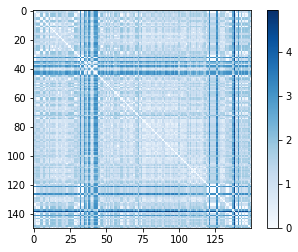

In [7]:
import matplotlib.pyplot as plt
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();
plt.show()

# SVM Linear Classifier

In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [9]:
strat_k_fold = StratifiedKFold(n_splits = 10, shuffle = True) #10

In [10]:
clf = svm.SVC(kernel="linear", C = 1.0)
scores_ln = cross_val_score(clf, D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_ln)

0.42000000000000004

In [11]:
clf = svm.SVC(kernel="linear", C = 1.0)
scores_ln = cross_val_score(clf, D, shock_labels, cv = strat_k_fold)
print(str(np.min(scores_ln)) +" - "+str(np.mean(scores_ln))+ " - " + str(np.max(scores_ln)) + " - "+ str(np.std(scores_ln)))

0.2 - 0.40499999999999997 - 0.6 - 0.10594810050208545


In [12]:
multi_clf = OneVsRestClassifier(estimator = clf)
scores_multi_ln = cross_val_score(multi_clf, D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_multi_ln)

0.425

In [13]:
multi_clf = OneVsOneClassifier(estimator = clf)
scores_multi_ln = cross_val_score(multi_clf, D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_multi_ln)

0.425

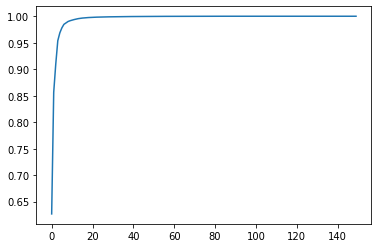

array([0.62685791, 0.85639685, 0.90957066])

In [14]:
PCA_D = PCA(n_components = 2).fit_transform(D)
plt.plot(np.cumsum(PCA().fit(D).explained_variance_ratio_))
plt.show()
np.cumsum(PCA().fit(D).explained_variance_ratio_)[:3]

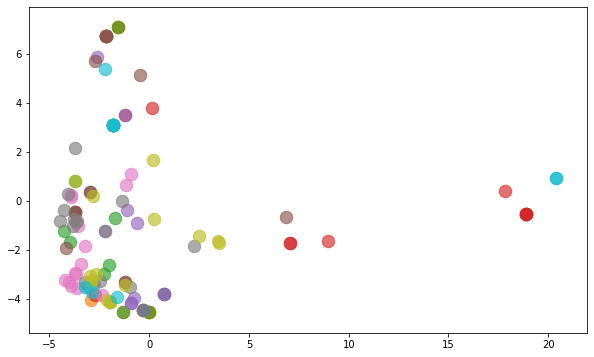

In [15]:
plt.figure(figsize=(10,6))
n_classes = 10
for i in range(n_classes):
    plt.scatter(PCA_D[shock_labels == i,0], PCA_D[shock_labels == i,1], s = 155, alpha = 0.65)
    
plt.axis('tight')
plt.style.use("ggplot")
plt.show()

# Manifold Learning Isomap

In [16]:
n_neighbors = 23
n_components = 2
iso_prj_D = manifold.Isomap(n_neighbors, n_components).fit_transform(D)

In [17]:
scores_ln = cross_val_score(clf, iso_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_ln)

0.22000000000000003

It seems that manifold learning with Isomap does not improve the performance of our linear svm classifier

In [18]:
multi_clf = OneVsOneClassifier(estimator = clf)
scores_multi_ln = cross_val_score(multi_clf, iso_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_multi_ln)

0.23499999999999996

In [19]:
multi_clf = OneVsRestClassifier(estimator = clf)
scores_multi_ln = cross_val_score(multi_clf, iso_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_multi_ln)

0.125

### Plots for Isomap

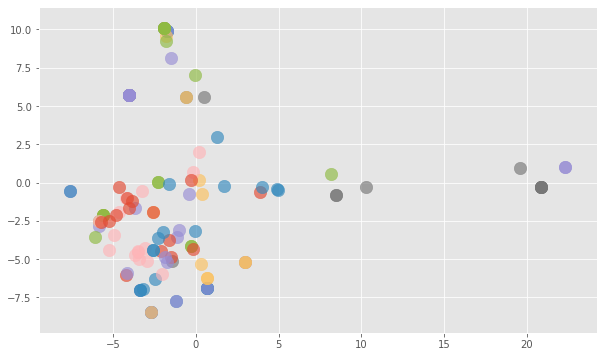

In [20]:
plt.figure(figsize=(10,6))
n_classes = 10
for i in range(n_classes):
    plt.scatter(iso_prj_D[shock_labels == i,0], iso_prj_D[shock_labels == i,1], s = 155, alpha = 0.65)
plt.axis('tight');
plt.show()

#### Fit with best n of components

In [21]:
opt_n_components = fit_n_components(D, shock_labels, manifold.Isomap, n_neighbors)
opt_n_components

19

In [22]:
opt_iso_prj_D = manifold.Isomap(n_neighbors, opt_n_components).fit_transform(D)

In [23]:
scores_ln = cross_val_score(clf, opt_iso_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_ln)

0.43

#  Manifold Learning LocalLinearEmbedding

In [24]:
lle_prj_D = manifold.LocallyLinearEmbedding(n_neighbors, n_components).fit_transform(D)

In [25]:
scores_ln = cross_val_score(clf, lle_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_ln)

0.21000000000000002

It seems that also manifold learning with LocalLinearEmbedding does not improve the performance of our linear svm classifier

In [26]:
multi_clf = OneVsRestClassifier(estimator = clf)
scores_multi_ln = cross_val_score(multi_clf, lle_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_multi_ln)

0.135

In [27]:
multi_clf = OneVsOneClassifier(estimator = clf)
scores_multi_ln = cross_val_score(multi_clf, lle_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_multi_ln)

0.21000000000000002

### Plot for LocalLinearEmbedding

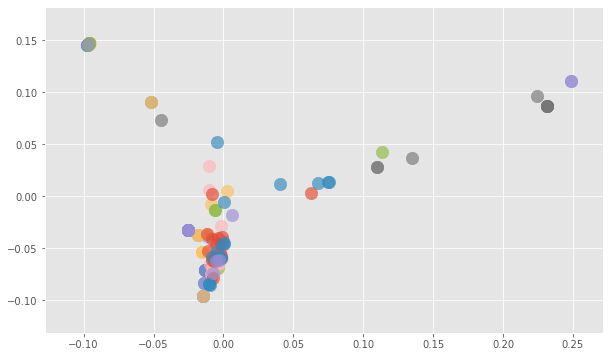

In [28]:
plt.figure(figsize=(10,6))
n_classes = 10
for i in range(n_classes):
    plt.scatter(lle_prj_D[shock_labels == i,0], lle_prj_D[shock_labels == i,1], s = 155, alpha = 0.65)
    
plt.axis('tight');
plt.grid(True)
plt.show()

#### Fit with best n of components

In [29]:
opt_n_components = fit_n_components(D, shock_labels, manifold.LocallyLinearEmbedding, n_neighbors)
opt_n_components

11

In [30]:
opt_iso_prj_D = manifold.LocallyLinearEmbedding(n_neighbors, opt_n_components).fit_transform(D)

In [31]:
scores_ln = cross_val_score(clf, opt_iso_prj_D, shock_labels, cv = strat_k_fold, n_jobs= 8)
np.mean(scores_ln)

0.43

# Graphs plots

In [32]:
import networkx as nx

G = nx.from_numpy_matrix(shock_graphs[10]['am'])
#pos=nx.spring_layout(G) # positions for all nodes
pos = nx.spring_layout(G, k = 0.9, iterations = 1000)
nx.draw_networkx_nodes(G, pos, with_labels= False, node_color = "green", node_size = 300, alpha = 0.8)
nx.draw_networkx_edges(G, pos, width = 2, alpha=0.5,edge_color='r')
plt.axis('off')
#plt.savefig("acidovorax_graph_10.png") # save as png
plt.show() # display

ModuleNotFoundError: No module named 'networkx'

In [ ]:
G = nx.from_numpy_matrix(shock_graphs[59]['am'])
#pos=nx.spring_layout(G) # positions for all nodes
pos = nx.spring_layout(G, k = 0.9, iterations = 1000)
nx.draw_networkx_nodes(G, pos, with_labels= False, node_color = "green", node_size = 300, alpha = 0.8)
nx.draw_networkx_edges(G, pos, width = 2, alpha=0.5,edge_color='r')
plt.axis('off')
#plt.savefig("Acidobacteria_graph_59.png") # save as png
plt.show() # display

In [ ]:
G = nx.from_numpy_matrix(shock_graphs[6]['am'])
#pos=nx.spring_layout(G) # positions for all nodes
pos = nx.spring_layout(G, k = 0.9, iterations = 1000)
nx.draw_networkx_nodes(G, pos, with_labels= False, node_color = "green", node_size = 300, alpha = 0.8)
nx.draw_networkx_edges(G, pos, width = 2, alpha=0.5,edge_color='r')
plt.axis('off')
#plt.savefig("acidovorax_graph_2.png") # save as png
plt.show() # display

In [ ]:
G = nx.from_numpy_matrix(shock_graphs[48]['am'])
#pos=nx.spring_layout(G) # positions for all nodes
pos = nx.spring_layout(G, k = 0.9, iterations = 1000)
nx.draw_networkx_nodes(G, pos, with_labels= False, node_color = "green", node_size = 300, alpha = 0.8)
nx.draw_networkx_edges(G, pos, width = 2, alpha=0.5,edge_color='r')
plt.axis('off')
#plt.savefig("Acidobacteria_graph_48.png") # save as png
plt.show() # display